In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import pickle
from sklearn import svm

In [77]:
pth = r"/Users/christianugwu/Downloads/ldata.csv"
df1 = pd.read_csv(pth)
df1

,YorubaWords,PartOfSpeech
0,"lojiji, lairotele.",adv
1,"fi-silę, ko-silę.",v
2,"fifisilę, kikosilę",adj
3,ikosilę pata- pata.,n
4,"rè-silę, te-logò.",v
...,...,...
10940,"adùn, abukun adun, gbigbadùn.",n
10941,"ti o şe segesege, ti o lo woro-woro.",adj
10942,irin bi tanganrin.,n
10943,ipa ona õrun nipa,n


In [78]:
pth2 = r"/Users/christianugwu/Downloads/Yoruba Dictionary.txt"
file=open(pth2,encoding="utf8")
data = file.read()
print(data)


A, pro. him, her, it. e.g., Mo fa a, "I draw him or her."
A, pro. contraction of awa' we. e.g., A nlo lola. " We are leaving to-morrow."
A, pro. contraction of awon,' they used in the formation of the Passive Voice. e.g., A sọ fun mi, "I am told"; Emi li a ri, "I am seen."
A, a prefix, used with a verb to form a noun. e.g., lọ, to go, àlọ, a going out; peja, to fish, apęja, a fisherman.
Aa! inter. word of exclamation. 
Abá, n. attempt, endeavour, motion, proposal, suggestion.
Aba or Abará, n. a slap with the palm of the hand. 
Abá, n. a kind of mat.
Aba, n. barn, granary, store, garner.
Aba, n. incubation. e.g., Adię mi nsaba, "My fowl is sitting."
Abádà, adv. (Hausa) for ever. 
Abadeni, n. a waylayer, one in ambush.
Abafu, n. luck, fortune, fate. 
Abaiyéjé, n. a busy-body, a meddling person. 
Abajà, n. certain facial marks among the Yoruba people. 
Abaję, n. a kind of yam.
Abáję, n. the act of eating together; mess .
 Abalá, n. a Yoruba pudding made with rice.
Abálé, n. frequent occu

In [79]:
data = [list(map(str, row.split(',',1))) for row in data.split('\n')]

In [80]:
data

[[''],
 ['A', ' pro. him, her, it. e.g., Mo fa a, "I draw him or her."'],
 ['A',
  ' pro. contraction of awa\' we. e.g., A nlo lola. " We are leaving to-morrow."'],
 ['A',
  ' pro. contraction of awon,\' they used in the formation of the Passive Voice. e.g., A sọ fun mi, "I am told"; Emi li a ri, "I am seen."'],
 ['A',
  ' a prefix, used with a verb to form a noun. e.g., lọ, to go, àlọ, a going out; peja, to fish, apęja, a fisherman.'],
 ['Aa! inter. word of exclamation. '],
 ['Abá', ' n. attempt, endeavour, motion, proposal, suggestion.'],
 ['Aba or Abará', ' n. a slap with the palm of the hand. '],
 ['Abá', ' n. a kind of mat.'],
 ['Aba', ' n. barn, granary, store, garner.'],
 ['Aba', ' n. incubation. e.g., Adię mi nsaba, "My fowl is sitting."'],
 ['Abádà', ' adv. (Hausa) for ever. '],
 ['Abadeni', ' n. a waylayer, one in ambush.'],
 ['Abafu', ' n. luck, fortune, fate. '],
 ['Abaiyéjé', ' n. a busy-body, a meddling person. '],
 ['Abajà', ' n. certain facial marks among the Yoruba peo

In [81]:
import pandas as pd
data = pd.DataFrame(data)
data.head(20)

,0,1
0,,None
1,A,"pro. him, her, it. e.g., Mo fa a, ""I draw him..."
2,A,"pro. contraction of awa' we. e.g., A nlo lola..."
3,A,"pro. contraction of awon,' they used in the f..."
4,A,"a prefix, used with a verb to form a noun. e...."
5,Aa! inter. word of exclamation.,None
6,Abá,"n. attempt, endeavour, motion, proposal, sugg..."
7,Aba or Abará,n. a slap with the palm of the hand.
8,Abá,n. a kind of mat.
9,Aba,"n. barn, granary, store, garner."


In [82]:
data['A'], data['B'] = data[1].str.split('.', n=1).str

/var/folders/wh/1nwkbmxd3d1749ptw866n3zh0000gn/T/ipykernel_65011/2691605033.py:1: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  data['A'], data['B'] = data[1].str.split('.', n=1).str


In [83]:
data.head(20)

,0,1,A,B
0,,None,None,None
1,A,"pro. him, her, it. e.g., Mo fa a, ""I draw him...",pro,"him, her, it. e.g., Mo fa a, ""I draw him or h..."
2,A,"pro. contraction of awa' we. e.g., A nlo lola...",pro,"contraction of awa' we. e.g., A nlo lola. "" W..."
3,A,"pro. contraction of awon,' they used in the f...",pro,"contraction of awon,' they used in the format..."
4,A,"a prefix, used with a verb to form a noun. e....","a prefix, used with a verb to form a noun","e.g., lọ, to go, àlọ, a going out; peja, to f..."
5,Aa! inter. word of exclamation.,None,None,None
6,Abá,"n. attempt, endeavour, motion, proposal, sugg...",n,"attempt, endeavour, motion, proposal, suggest..."
7,Aba or Abará,n. a slap with the palm of the hand.,n,a slap with the palm of the hand.
8,Abá,n. a kind of mat.,n,a kind of mat.
9,Aba,"n. barn, granary, store, garner.",n,"barn, granary, store, garner."


In [84]:
data1 = data.drop([1, 'B'], axis=1)

In [85]:
data1.head(30)

,0,A
0,,None
1,A,pro
2,A,pro
3,A,pro
4,A,"a prefix, used with a verb to form a noun"
5,Aa! inter. word of exclamation.,None
6,Abá,n
7,Aba or Abará,n
8,Abá,n
9,Aba,n


In [86]:
data1.describe()

,0,A
count,10975,10811
unique,10328,915
top,,n
freq,56,5427


In [87]:
data1.dropna() #drop null values

,0,A
1,A,pro
2,A,pro
3,A,pro
4,A,"a prefix, used with a verb to form a noun"
6,Abá,n
...,...,...
10939,Yún,"Hún, v"
10940,Yún,v
10941,Yùn,v
10942,Yùn-já,v


In [88]:
data1.head(30)

,0,A
0,,None
1,A,pro
2,A,pro
3,A,pro
4,A,"a prefix, used with a verb to form a noun"
5,Aa! inter. word of exclamation.,None
6,Abá,n
7,Aba or Abará,n
8,Abá,n
9,Aba,n


In [89]:
df=data1.tail(-1)
df.head(30)

,0,A
1,A,pro
2,A,pro
3,A,pro
4,A,"a prefix, used with a verb to form a noun"
5,Aa! inter. word of exclamation.,None
6,Abá,n
7,Aba or Abará,n
8,Abá,n
9,Aba,n
10,Aba,n


In [90]:
column_mapping = {0:'YorubaWords', 'A': 'PartOfSpeech'}
df.columns = [column_mapping[col] if col in column_mapping else col for col in df.columns]


In [91]:
df.head(30)

,YorubaWords,PartOfSpeech
1,A,pro
2,A,pro
3,A,pro
4,A,"a prefix, used with a verb to form a noun"
5,Aa! inter. word of exclamation.,None
6,Abá,n
7,Aba or Abará,n
8,Abá,n
9,Aba,n
10,Aba,n


In [92]:
df.dropna(inplace=True)

/var/folders/wh/1nwkbmxd3d1749ptw866n3zh0000gn/T/ipykernel_65011/1379821321.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


In [93]:
df.head(40)

,YorubaWords,PartOfSpeech
1,A,pro
2,A,pro
3,A,pro
4,A,"a prefix, used with a verb to form a noun"
6,Abá,n
7,Aba or Abará,n
8,Abá,n
9,Aba,n
10,Aba,n
11,Abádà,adv


In [94]:
df= df.loc[df['PartOfSpeech'].isin([' pro',' adv',' n',' adj', ' conj',' inter', ' v.t', ' v.i', ' prep', ' v', ' interj'])]

In [95]:
print(len(df))

9850


In [96]:
df.tail(50)

,YorubaWords,PartOfSpeech
10881,Yinlogo,v
10882,to shoot with a gun. Yinfin,v
10883,Yinyin,n
10884,Yio,v
10885,Yipada,v
10886,Yipo,v
10887,Yiyin,adj
10888,Yiyó,adj
10889,Yiyoşuti,n
10890,Yó,v


In [97]:
df['PartOfSpeech'].replace(' inter',' interj', inplace =True)

In [98]:
df['PartOfSpeech'].unique()

array([' pro', ' n', ' adv', ' adj', ' conj', ' interj', ' v', ' prep'],
      dtype=object)

In [99]:
df= pd.concat([df1,df], ignore_index=True)
df.head(50)

,YorubaWords,PartOfSpeech
0,"lojiji, lairotele.",adv
1,"fi-silę, ko-silę.",v
2,"fifisilę, kikosilę",adj
3,ikosilę pata- pata.,n
4,"rè-silę, te-logò.",v
5,"irèsilę, iteloriba.",n
6,"dojuti, dāmu.",v
7,"bùkù, dinkù, fa-sehin.",v
8,"ibùkù, ifasęhin.",n
9,ilé Olorun.,n


In [100]:
df['YorubaWords'], df['B'] = df['YorubaWords'].str.split(',', n=1).str

/var/folders/wh/1nwkbmxd3d1749ptw866n3zh0000gn/T/ipykernel_65011/2535608236.py:1: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  df['YorubaWords'], df['B'] = df['YorubaWords'].str.split(',', n=1).str


In [101]:
#df = df.drop('yoruba', axis=1)

In [102]:
df.head(5)

,YorubaWords,PartOfSpeech,B
0,lojiji,adv,lairotele.
1,fi-silę,v,ko-silę.
2,fifisilę,adj,kikosilę
3,ikosilę pata- pata.,n,NaN
4,rè-silę,v,te-logò.


In [103]:
df = df.drop(['B'],axis=1)

In [104]:
df.head(10)

,YorubaWords,PartOfSpeech
0,lojiji,adv
1,fi-silę,v
2,fifisilę,adj
3,ikosilę pata- pata.,n
4,rè-silę,v
5,irèsilę,n
6,dojuti,v
7,bùkù,v
8,ibùkù,n
9,ilé Olorun.,n


In [31]:
# total amount of rows and columns
total_rows=len(df.axes[0])
print("total rows", total_rows)
total_cols=len(df.axes[1])
print("total columns", total_cols)

total rows 20795
total columns 2


In [32]:
data_count = pd.value_counts(df['PartOfSpeech'].values)
print("Number of labels in Entire Data")
print(data_count)
X_train, X_test, y_train, y_test = train_test_split(df['YorubaWords'], df['PartOfSpeech'], test_size=0.2
                                                   )
X_train=X_train.astype(str)
X_test=X_test.astype(str)
y_train_count = y_train.value_counts()
y_test_count = y_test.value_counts()
print("Number of labels in y_train")
print(y_train_count)
print("Number of labels in y_test")
print(y_test_count)
print("Number of Training Sample: ",X_train.shape)
print("Number of Training label: ",y_train.shape)
print("Number of Test Sample: ",X_test.shape)
print("Number of Test label: ",y_test.shape)

Number of labels in Entire Data
 n         11668
 v          4672
 adj        3412
 adv         894
 prep         74
 conj         36
 interj       23
 pro          16
dtype: int64
Number of labels in y_train
 n         9302
 v         3747
 adj       2733
 adv        728
 prep        63
 conj        31
 interj      19
 pro         13
Name: PartOfSpeech, dtype: int64
Number of labels in y_test
 n         2366
 v          925
 adj        679
 adv        166
 prep        11
 conj         5
 interj       4
 pro          3
Name: PartOfSpeech, dtype: int64
Number of Training Sample:  (16636,)
Number of Training label:  (16636,)
Number of Test Sample:  (4159,)
Number of Test label:  (4159,)


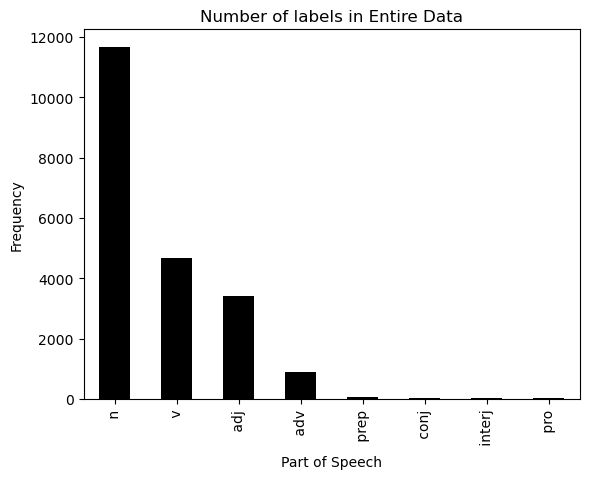

In [33]:
data_count.plot(kind='bar',color='black')
plt.title("Number of labels in Entire Data")
plt.xlabel("Part of Speech")
plt.ylabel("Frequency")
plt.show()

In [34]:
test_label_count = y_test

In [35]:
# IMPORT TfidfVectorizer()
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

#convert data to string and loop
corpus = [str (X_train) for item in X_train]

#apply the tfidvectorizer to training features: x_train
Xx = vectorizer.fit_transform((corpus))

#print(Xx.shape)

In [36]:
from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()
#number of classes we want to predict
yyy=lb.fit_transform(y_train.astype(str))

print ("the targets we want to predict are")
print (lb.classes_)

print ("the targets encoding are")
print (yyy)

the targets we want to predict are
[' adj' ' adv' ' conj' ' interj' ' n' ' prep' ' pro' ' v']
the targets encoding are
[[0 0 0 ... 0 0 1]
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


## COMPARISON

In [37]:
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPClassifier
pipeline = Pipeline([('vect', TfidfVectorizer(ngram_range=(1, 2), stop_words="english", sublinear_tf=True)),
                     
                     ('clf', MLPClassifier(hidden_layer_sizes=100, activation='relu', solver='adam', alpha=0.0001, 
                                batch_size='auto', learning_rate='constant', learning_rate_init=0.001, 
                                max_iter=1000, shuffle=True,
                                random_state=8, early_stopping=False))])



y_train= y_train.dropna()

Xx= X_train

model = pipeline.fit(Xx, y_train)








print("accuracy of the ANN model on the test data set: " + str(model.score(Xx, y_train)))

accuracy of the ANN model on the test data set: 0.9739119980764607


In [38]:
model2 = pipeline.fit(X_test, y_test)
print("accuracy of the ANN model on the test data set: " + str(model2.score(X_test, y_test)))

accuracy of the ANN model on the test data set: 0.9860543399855735


In [44]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(min_df=1, max_df=1.0, lowercase=True) 
X = cv.fit_transform(corpus)

In [45]:

#K-Neighbour Classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X, y_train)
train_acc = knn.score(X, y_train)
print("Training accuracy Of K-Neighbour Classifier is:", train_acc )

Training accuracy Of K-Neighbour Classifier is: 0.5591488338542919


In [48]:
X1 = cv.fit_transform(X_test)
model3 = knn.fit(X1, y_test)
print(" Testing accuracy Of K-Neighbour Classifier is:" + str(model3.score(X1, y_test)))


 Testing accuracy Of K-Neighbour Classifier is:0.7672517432075018


In [49]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier()
clf.fit(X, y_train)
train_acc1 = clf.score(X, y_train)
print("Training accuracy Of RandomForestClassifier is:", train_acc1 )

Training accuracy Of RandomForestClassifier is: 0.5591488338542919


In [50]:
X2 = cv.fit_transform(X_test)
model4 = clf.fit(X2, y_test)
print(" Testing accuracy Of RandomForestClassifier is:" + str(model4.score(X2, y_test)))


 Testing accuracy Of RandomForestClassifier is:0.98821832171195


In [51]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X,y_train)

train_acc2 = logmodel.score(X, y_train)
print("Training accuracy Of Logistic Regression  is:", train_acc2 )

Training accuracy Of Logistic Regression  is: 0.5591488338542919


In [52]:
X3 = cv.fit_transform(X_test)
model5 = logmodel.fit(X3, y_test)
print(" Testing accuracy Of Logistic Regression  is: " + str(model5.score(X3, y_test)))

 Testing accuracy Of Logistic Regression  is: 0.7528251983649916


In [54]:
from sklearn.metrics import confusion_matrix
predictions = model.predict(X_test)

<Figure size 900x900 with 0 Axes>

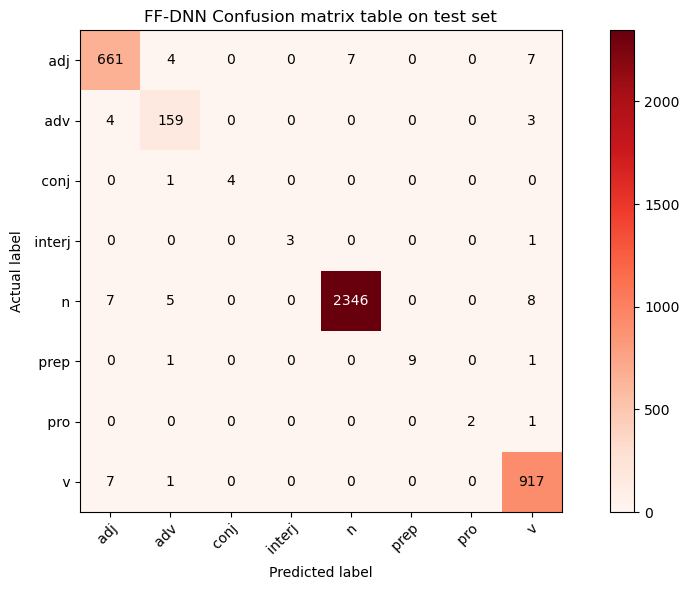

In [57]:
import matplotlib.pyplot as plt
from sklearn.utils.multiclass import unique_labels
def plot_confusion_matrix(y_true, y_pred, classes,
                          title=None,
                          cmap=plt.cm.Reds):
    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = list(unique_labels(y_true, y_pred))
    # print(cm)

    fig, ax = plt.subplots(figsize = (10,6))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='Actual label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    # Loop over data dimensions and create text annotations.
    fmt = 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

# Plot non-normalized confusion matrix
plt.figure(figsize=(9,9))
class_label = ['Adj', 'Adv', 'Conj', 'Det', 'N','PP','Prn', 'V']
plot_confusion_matrix(y_test, predictions,classes = class_label,title='FF-DNN Confusion matrix table on test set')  
plt.show()

In [56]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         adj       0.97      0.97      0.97       679
         adv       0.93      0.96      0.94       166
        conj       1.00      0.80      0.89         5
      interj       1.00      0.75      0.86         4
           n       1.00      0.99      0.99      2366
        prep       1.00      0.82      0.90        11
         pro       1.00      0.67      0.80         3
           v       0.98      0.99      0.98       925

    accuracy                           0.99      4159
   macro avg       0.98      0.87      0.92      4159
weighted avg       0.99      0.99      0.99      4159



In [62]:
prediction2 = model3.predict(X1)

<Figure size 900x900 with 0 Axes>

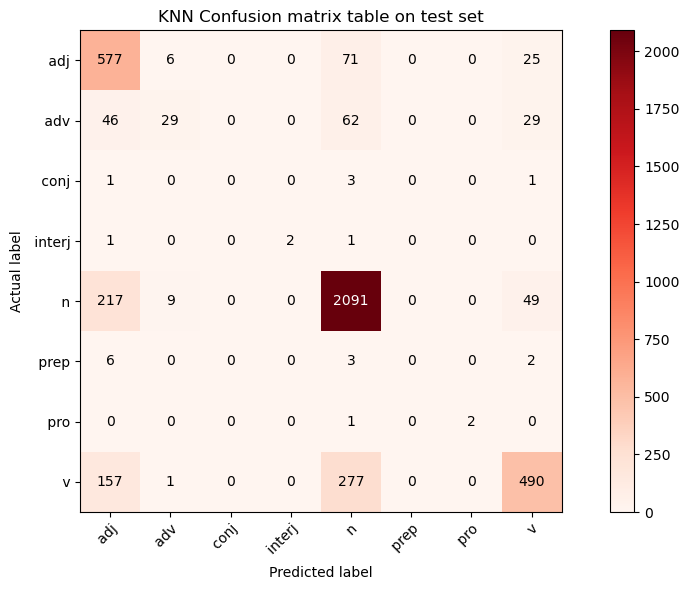

In [63]:
import matplotlib.pyplot as plt
from sklearn.utils.multiclass import unique_labels
def plot_confusion_matrix(y_true, y_pred, classes,
                          title=None,
                          cmap=plt.cm.Reds):
    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = list(unique_labels(y_true, y_pred))
    # print(cm)

    fig, ax = plt.subplots(figsize = (10,6))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='Actual label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    # Loop over data dimensions and create text annotations.
    fmt = 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

# Plot non-normalized confusion matrix
plt.figure(figsize=(9,9))
class_label = ['Adj', 'Adv', 'Conj', 'Det', 'N','PP','Prn', 'V']
plot_confusion_matrix(y_test, prediction2,classes = class_label,title='KNN Confusion matrix table on test set')  
plt.show()

In [65]:
from sklearn.metrics import classification_report
print(classification_report(y_test, prediction2))

              precision    recall  f1-score   support

         adj       0.57      0.85      0.69       679
         adv       0.64      0.17      0.27       166
        conj       0.00      0.00      0.00         5
      interj       1.00      0.50      0.67         4
           n       0.83      0.88      0.86      2366
        prep       0.00      0.00      0.00        11
         pro       1.00      0.67      0.80         3
           v       0.82      0.53      0.64       925

    accuracy                           0.77      4159
   macro avg       0.61      0.45      0.49      4159
weighted avg       0.78      0.77      0.76      4159



/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [66]:
prediction3 = model4.predict(X2)

<Figure size 900x900 with 0 Axes>

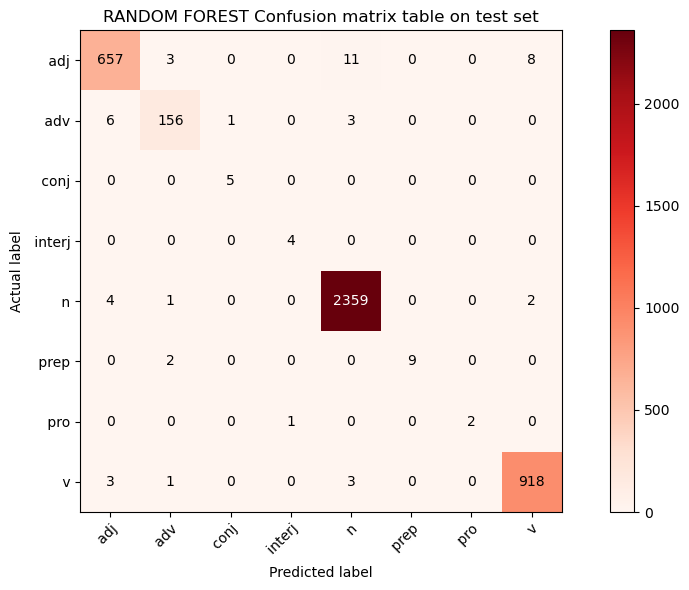

In [67]:
import matplotlib.pyplot as plt
from sklearn.utils.multiclass import unique_labels
def plot_confusion_matrix(y_true, y_pred, classes,
                          title=None,
                          cmap=plt.cm.Reds):
    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = list(unique_labels(y_true, y_pred))
    # print(cm)

    fig, ax = plt.subplots(figsize = (10,6))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='Actual label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    # Loop over data dimensions and create text annotations.
    fmt = 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

# Plot non-normalized confusion matrix
plt.figure(figsize=(9,9))
class_label = ['Adj', 'Adv', 'Conj', 'Det', 'N','PP','Prn', 'V']
plot_confusion_matrix(y_test, prediction3,classes = class_label,title='RANDOM FOREST Confusion matrix table on test set')  
plt.show()

In [68]:
from sklearn.metrics import classification_report
print(classification_report(y_test, prediction3))

              precision    recall  f1-score   support

         adj       0.98      0.97      0.97       679
         adv       0.96      0.94      0.95       166
        conj       0.83      1.00      0.91         5
      interj       0.80      1.00      0.89         4
           n       0.99      1.00      0.99      2366
        prep       1.00      0.82      0.90        11
         pro       1.00      0.67      0.80         3
           v       0.99      0.99      0.99       925

    accuracy                           0.99      4159
   macro avg       0.94      0.92      0.93      4159
weighted avg       0.99      0.99      0.99      4159



In [69]:
prediction4 = model5.predict(X3)

<Figure size 900x900 with 0 Axes>

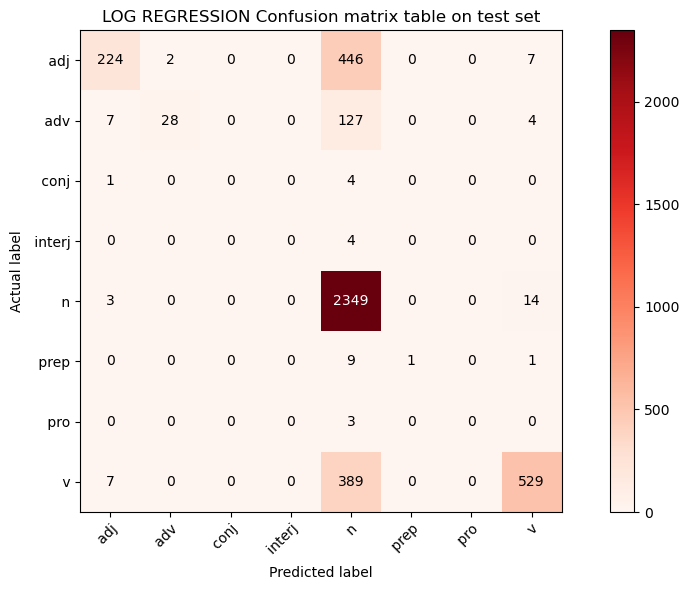

In [71]:
import matplotlib.pyplot as plt
from sklearn.utils.multiclass import unique_labels
def plot_confusion_matrix(y_true, y_pred, classes,
                          title=None,
                          cmap=plt.cm.Reds):
    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = list(unique_labels(y_true, y_pred))
    # print(cm)

    fig, ax = plt.subplots(figsize = (10,6))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='Actual label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    # Loop over data dimensions and create text annotations.
    fmt = 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

# Plot non-normalized confusion matrix
plt.figure(figsize=(9,9))
class_label = ['Adj', 'Adv', 'Conj', 'Det', 'N','PP','Prn', 'V']
plot_confusion_matrix(y_test, prediction4,classes = class_label,title='LOG REGRESSION Confusion matrix table on test set')  
plt.show()

In [72]:
from sklearn.metrics import classification_report
print(classification_report(y_test, prediction4))

              precision    recall  f1-score   support

         adj       0.93      0.33      0.49       679
         adv       0.93      0.17      0.29       166
        conj       0.00      0.00      0.00         5
      interj       0.00      0.00      0.00         4
           n       0.71      0.99      0.82      2366
        prep       1.00      0.09      0.17        11
         pro       0.00      0.00      0.00         3
           v       0.95      0.57      0.71       925

    accuracy                           0.75      4159
   macro avg       0.56      0.27      0.31      4159
weighted avg       0.80      0.75      0.72      4159



/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


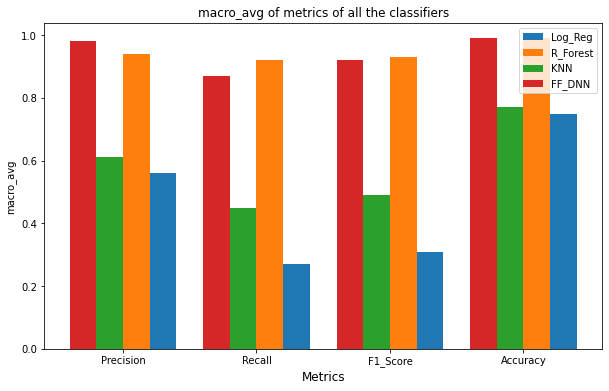

In [41]:
import numpy as np  
import matplotlib.pyplot as plt  
'''  
X = ['Log Regression','Random Forest','KNN','FFDNN'] 
Precision = [0.56,0.94,0.61,0.98] 
Recall = [0.27,0.92,0.45,0.87] 
F1_score = [0.31,0.93,0.49,0.92] 
''' 
X = ['Precision','Recall','F1_Score','Accuracy'] 
Log_Reg = [0.56,0.27,0.31,0.75] 
R_Forest = [0.94,0.92,0.93,0.99] 
KNN = [0.61,0.45,0.49,0.77]
FF_DNN = [0.98,0.87,0.92,0.99]
  
X_axis = np.arange(len(X)) 

fig = plt.figure(figsize=(10,6))
#fig, ax = plt.subplots()  


plt.bar(X_axis - 0.2,Log_Reg, 0.2, label = 'Log_Reg') 
plt.bar(X_axis - 0.4,R_Forest, 0.2, label = 'R_Forest') 
plt.bar(X_axis - 0.6,KNN, 0.2, label = 'KNN')
plt.bar(X_axis - 0.8,FF_DNN, 0.2, label = 'FF_DNN') 

plt.xticks(X_axis - 0.5, X) 

plt.xlabel("Metrics", fontsize = 12, loc = "center")
  
plt.ylabel("macro_avg") 
plt.title("macro_avg of metrics of all the classifiers") 
plt.legend(loc ="upper right") 
fig.align_labels()
plt.show() 

In [14]:
#To save the model
import pickle
pickle_out = open("yoruba.pickle","wb")
pickle.dump(model, pickle_out)
pickle_out.close()

NameError: name 'model' is not defined

In [124]:
# saving and using your trained model
import pickle
pickle_in = open("yoruba.pickle","rb")
model = pickle.load(pickle_in)

In [125]:
splitted3 = "èdè"
splitted3=splitted3.split()
print (model.predict(splitted3))

[' n']


In [126]:
splitted2 = "Yo-kuro"
splitted2=splitted2.split()
print (model.predict(splitted2))

[' v']


In [127]:
splitted2 = "ilẹ̀ Yo"
splitted2=splitted2.split()
print (model.predict(splitted2))

[' n' ' v']


In [128]:
splitted2 = "Tolá n-sun"
splitted2=splitted2.split()
print (model.predict(splitted2))

[' n' ' v']


In [129]:
splitted2 = " Akínlàdé "
splitted2=splitted2.split()
print (model.predict(splitted2))

[' n']


In [130]:
splitted2 = "Akínlàdé n-jeun "
splitted2=splitted2.split()
print (model.predict(splitted2))

[' n' ' v']


In [135]:
splitted2 = "On joko"
splitted2=splitted2.split()
print (model.predict(splitted2))

[' n' ' v']


In [133]:
splitted2 = " Ade je isu"
splitted2=splitted2.split()
print (model.predict(splitted2))

[' n' ' v' ' n']


In [134]:
splitted2 = " OLaide na eran"
splitted2=splitted2.split()
print (model.predict(splitted2))

[' n' ' v' ' n']
